In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score



In [87]:
cancer = pd.read_csv('data.csv')

In [88]:
def encode_Diagnosis(x):
  if x == "B":
    return 0
  elif x == "M":
    return 1
cancer["encode_Diagnosis"] = cancer.apply(lambda x: encode_Diagnosis(x["Diagnosis"]),axis=1)

In [89]:
y = cancer[['encode_Diagnosis']]
x = cancer.drop(columns=['Diagnosis','encode_Diagnosis','ID',], axis=1)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=49)


In [91]:
lr = LogisticRegression(max_iter=1000)


In [92]:
lr_model = lr.fit(x_train,y_train.values.ravel())
predictions = lr_model.predict(x_test)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
print("NaiveBayes Accuracy:",accuracy_score(y_test, predictions))
print("NaiveBayes Precision:",precision_score(y_test, predictions))
print("NaiveBayes Recall:",recall_score(y_test, predictions))
print("NaiveBayes F1-score:",f1_score(y_test, predictions))

NaiveBayes Accuracy: 0.9181286549707602
NaiveBayes Precision: 0.9047619047619048
NaiveBayes Recall: 0.8769230769230769
NaiveBayes F1-score: 0.890625


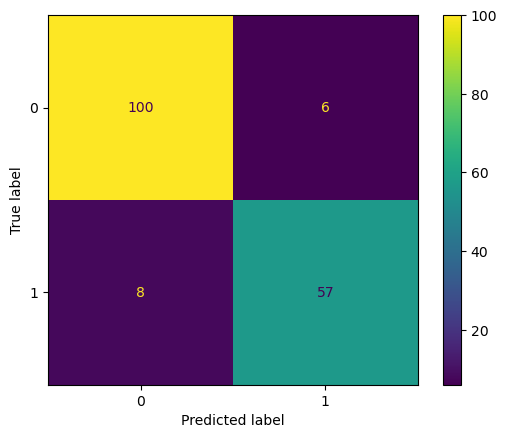

In [94]:
cm = confusion_matrix(y_test, predictions,labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

In [95]:
 y_score = lr_model.predict_proba(x_test)[:,1]

In [96]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score  Logistic regression: ', roc_auc_score(y_test, y_score))

roc_auc_score  Logistic regression:  0.9857764876632802


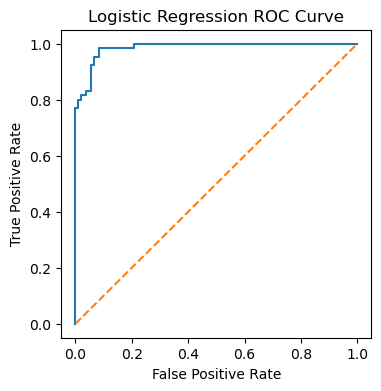

In [97]:
plt.subplots(1, figsize=(4,4))
plt.title('Logistic Regression ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()